In [94]:
%matplotlib inline
import pandas as pd # Import the pandas library
import matplotlib.pyplot as plt # Import the pyplot module

In [95]:
# Read the CSV file
df = pd.read_csv('Resources/tech_survey.csv')

**TELLING THE STORY:**
Using our Dataframe, we start by Analyzing the Impact of Mental Health on Work Performance

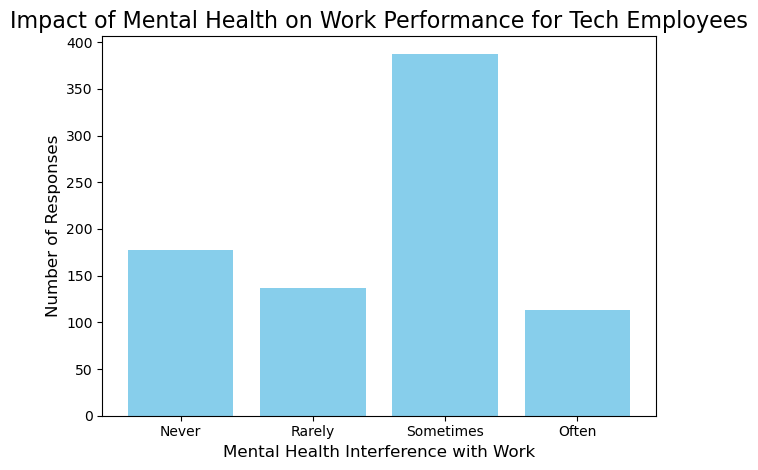

In [96]:

# Filter responses to include only tech employees
tech_employees_df = df[df['tech_company'] == 'Yes']
# Drop NaN values in 'work_interfere' to focus on meaningful responses
tech_employees_df = tech_employees_df.dropna(subset=['work_interfere'])

# Get value counts for 'work_interfere' 
work_interfere_counts = tech_employees_df['work_interfere'].value_counts().reindex(['Never', 'Rarely', 'Sometimes', 'Often'], fill_value=0)

# Plot using matplotlib
plt.bar(work_interfere_counts.index, work_interfere_counts.values, color='skyblue')

# Create chart titles
plt.title('Impact of Mental Health on Work Performance for Tech Employees', fontsize=16)
plt.xlabel('Mental Health Interference with Work', fontsize=12)
plt.ylabel('Number of Responses', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


Next, we want to see the Percentage of Tech Employees seeking treatment for a mental health conditions

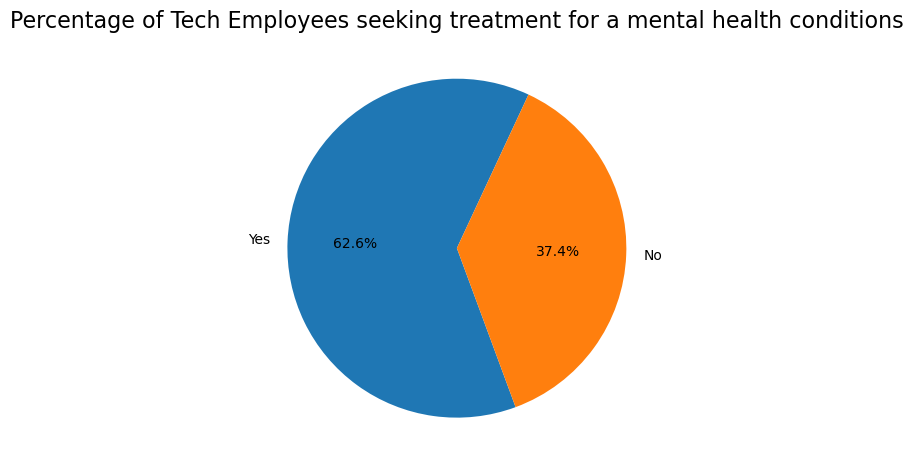

In [97]:
# Drop NaN values in 'treatment' to clean data and focus on meaningful responses
tech_employees_df = tech_employees_df.dropna(subset=['treatment'])

# Get value counts for 'treatment'
treatment_counts = tech_employees_df['treatment'].value_counts()

# Plot pie chart using matplotlib
plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', startangle=65)

# Add Title
plt.title('Percentage of Tech Employees seeking treatment for a mental health conditions', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

Do workers know they can get help? Let's find out how many are aware of mental health resources, if they are available, and what types of care options exist

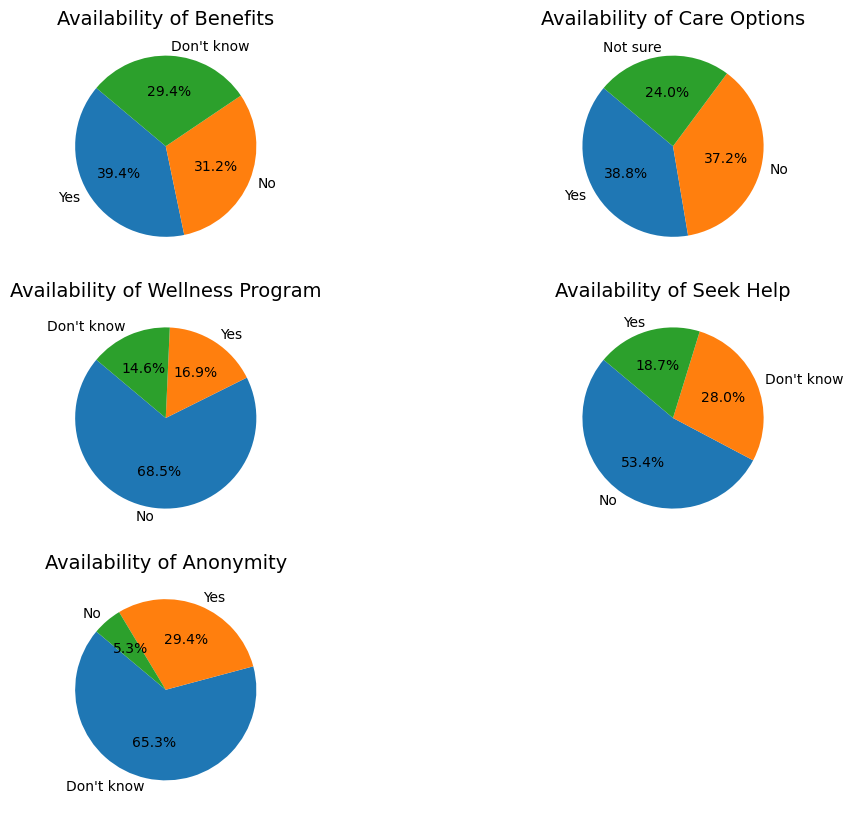

In [98]:
# Drop NaN values in the following columns to clean data
resource_columns = ['benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity']
tech_employees_df = tech_employees_df.dropna(subset=resource_columns)

# Get value counts for each resource-related question
resource_availability = {column: tech_employees_df[column].value_counts() for column in resource_columns}

# Plotting the availability of mental health resources using subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()  # Flatten for easier indexing

# Create pie charts for each resource question
for i, (column, counts) in enumerate(resource_availability.items()):
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Availability of {column.replace("_", " ").title()}', fontsize=14)
# Remove empty subplots if any

fig.delaxes(axes[5])
plt.show()

What is the Perception of Mental Health vs Physical Health Among Tech Employees?

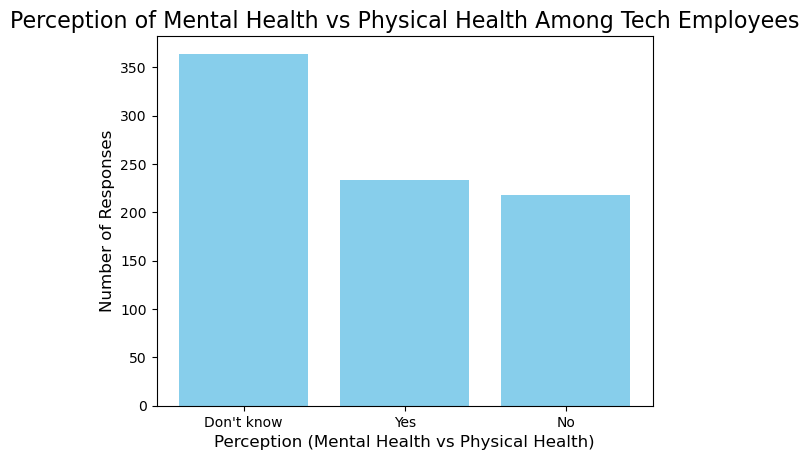

In [99]:
# Drop NaN values in 'mental_vs_physical'
tech_employees_df = tech_employees_df.dropna(subset=['mental_vs_physical'])

# Get value counts for 'mental_vs_physical'
mental_vs_physical_counts = tech_employees_df['mental_vs_physical'].value_counts()

# Plotting the results using a bar chart
plt.bar(mental_vs_physical_counts.index, mental_vs_physical_counts.values, color='skyblue')

# Customize the chart
plt.title('Perception of Mental Health vs Physical Health Among Tech Employees', fontsize=16)
plt.xlabel('Perception (Mental Health vs Physical Health)', fontsize=12)
plt.ylabel('Number of Responses', fontsize=12)

# Display the plot
plt.show()

Will there be Consequences for Discussing Mental Health Issues at work? What is the Perception?

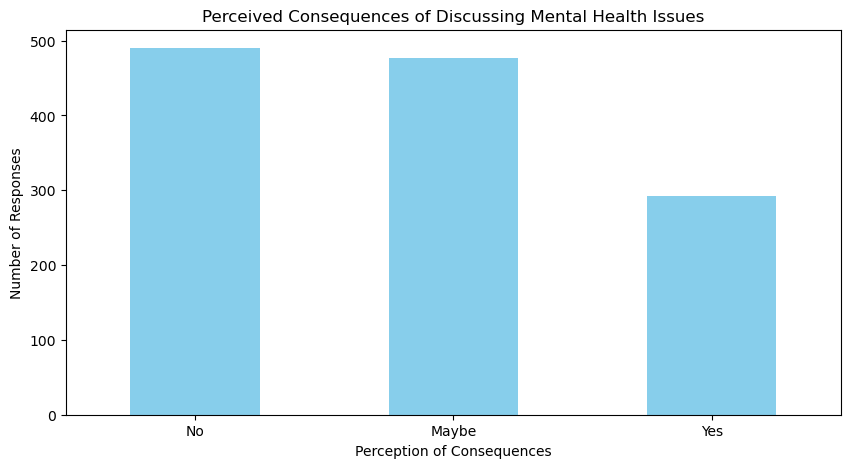

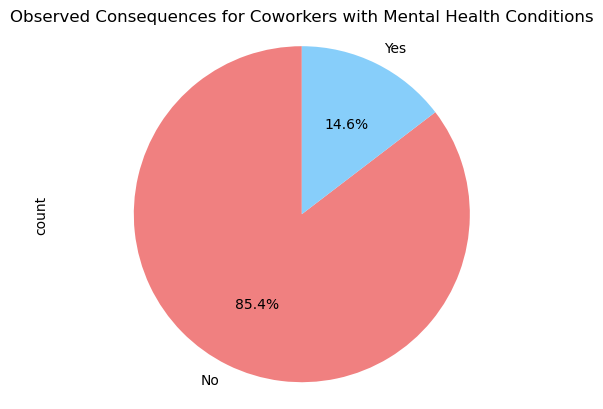

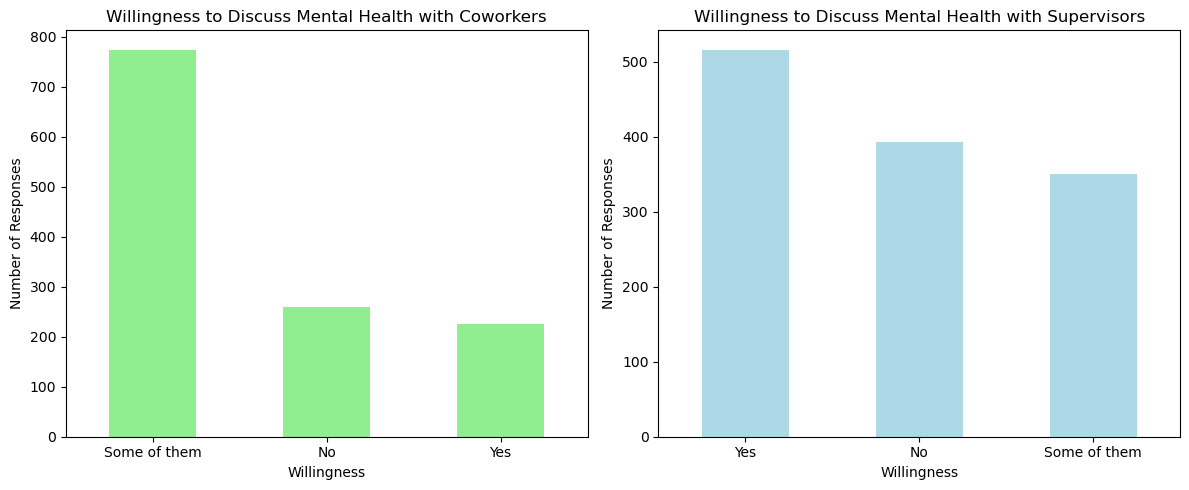

In [100]:
# Filter relevant data
stigma_data = df[['mental_health_consequence', 'obs_consequence', 'coworkers', 'supervisor']]

# Analyze Stigmatization
# Count responses for mental health consequences
stigma_counts = stigma_data['mental_health_consequence'].value_counts()

# Create a bar chart for mental health consequences
plt.figure(figsize=(10, 5))
stigma_counts.plot(kind='bar', color='skyblue')
plt.title('Perceived Consequences of Discussing Mental Health Issues')
plt.xlabel('Perception of Consequences')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)
plt.show()

# Analyze Observed Consequences
# Count observed consequences for coworkers
observed_counts = stigma_data['obs_consequence'].value_counts()

# Create a pie chart for observed consequences
observed_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Observed Consequences for Coworkers with Mental Health Conditions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Analyze willingness to discuss with coworkers and supervisors
willingness_counts_coworkers = stigma_data['coworkers'].value_counts()
willingness_counts_supervisor = stigma_data['supervisor'].value_counts()

# Create side-by-side bar charts for willingness to discuss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
willingness_counts_coworkers.plot(kind='bar', color='lightgreen')
plt.title('Willingness to Discuss Mental Health with Coworkers')
plt.xlabel('Willingness')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
willingness_counts_supervisor.plot(kind='bar', color='lightblue')
plt.title('Willingness to Discuss Mental Health with Supervisors')
plt.xlabel('Willingness')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

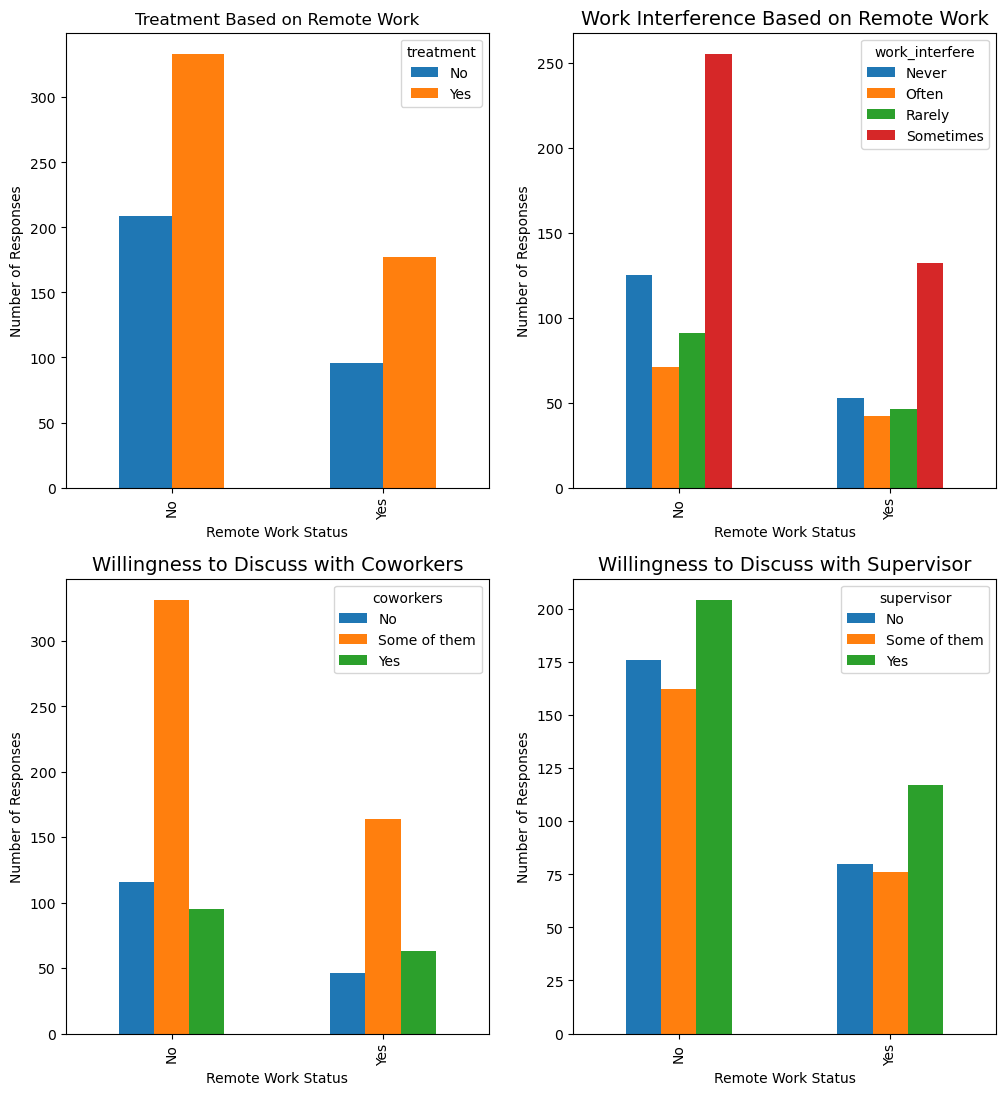

In [102]:
# Drop NaN values in relevant columns
mental_health_columns = ['remote_work', 'treatment', 'work_interfere', 'coworkers', 'supervisor']
tech_employees_df = tech_employees_df.dropna(subset=mental_health_columns)

# Count responses for treatment based on remote work status
treatment_counts = tech_employees_df.groupby('remote_work')['treatment'].value_counts().unstack(fill_value=0)

#Count responses for work interference based on remote work status
work_interfere_counts = tech_employees_df.groupby('remote_work')['work_interfere'].value_counts().unstack(fill_value=0)

# Count willingness to discuss mental health based on remote work status
coworkers_counts = tech_employees_df.groupby('remote_work')['coworkers'].value_counts().unstack(fill_value=0)
supervisor_counts = tech_employees_df.groupby('remote_work')['supervisor'].value_counts().unstack(fill_value=0)

# Plotting the results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 13))

# Treatment plot
treatment_counts.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Treatment Based on Remote Work')
axes[0, 0].set_ylabel('Number of Responses')
axes[0, 0].set_xlabel('Working Remote')

# Work Interference plot
work_interfere_counts.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Work Interference Based on Remote Work', fontsize=14)
axes[0, 1].set_ylabel('Number of Responses')
axes[0, 1].set_xlabel('Working Remote')

# Willingness to Discuss with Coworkers plot
coworkers_counts.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Willingness to Discuss with Coworkers', fontsize=14)
axes[1, 0].set_ylabel('Number of Responses')
axes[1, 0].set_xlabel('Working Remote')

# Willingness to Discuss with Supervisor plot
supervisor_counts.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Willingness to Discuss with Supervisor', fontsize=14)
axes[1, 1].set_ylabel('Number of Responses')
axes[1, 1].set_xlabel('Working Remote')

plt.show()

